## Task 1 Part a)

In [3]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
import io
from PIL import Image
import hashlib
import random
import re

In [1]:
PEXELS_API_KEY = "bFuUPaQfE4ZJpkPgBaV0cbuuIh0A5ie0o5jjXQf1NRoyAFcy4zduwUE9"

In [4]:
def download_images_pexels(query, folder_path, num_images=50):
    # Create folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)
    
    # Metadata list
    metadata = []
    
    # API headers
    headers = {
        "Authorization": PEXELS_API_KEY
    }
    
    # Calculate number of pages to fetch (15 images per page max)
    num_pages = (num_images + 14) // 15
    count = 0
    
    try:
        for page in range(1, num_pages + 1):
            # API endpoint
            url = f"https://api.pexels.com/v1/search?query={query}&per_page=15&page={page}"
            
            # Make API request
            response = requests.get(url, headers=headers)
            
            if response.status_code == 200:
                data = response.json()
                
                # Process each photo
                for photo in data.get("photos", []):
                    if count >= num_images:
                        break
                    
                    # Get image URL and info
                    img_url = photo["src"]["original"]
                    img_width = photo["width"]
                    img_height = photo["height"]
                    photographer = photo["photographer"]
                    
                    try:
                        # Download image
                        img_response = requests.get(img_url)
                        
                        if img_response.status_code == 200:
                            # Generate filename
                            filename = hashlib.md5(img_url.encode()).hexdigest() + ".jpg"
                            file_path = os.path.join(folder_path, filename)
                            
                            # Save image
                            with open(file_path, "wb") as f:
                                f.write(img_response.content)
                            
                            # Add metadata
                            metadata.append({
                                "category": query,
                                "url": img_url,
                                "filename": filename,
                                "resolution": f"{img_width}x{img_height}",
                                "width": img_width,
                                "height": img_height,
                                "photographer": photographer,
                                "source": "Pexels API"
                            })
                            
                            count += 1
                            print(f"Downloaded {count}/{num_images} images for {query}")
                            
                            # Be gentle to the API
                            time.sleep(0.5)
                    
                    except Exception as e:
                        print(f"Error downloading image: {e}")
            
            else:
                print(f"API request failed with status code {response.status_code}: {response.text}")
                break
            
            # If we've reached the desired count or there are no more images, break
            if count >= num_images or "next_page" not in data or data["next_page"] is None:
                break
                
            # Be nice to the API
            time.sleep(1)
        
        print(f"Downloaded {count} images for category '{query}'")
        
    except Exception as e:
        print(f"Error processing category {query}: {e}")
    
    return metadata

In [5]:
# List of 20 categories
categories = [
    "Indian Street Food", "Historic Monuments", "Traditional Dance", 
    "Modern Architecture", "Wildlife Conservation", "Rural Landscapes",
    "Urban Markets", "Festival Celebrations", "Classical Music Instruments",
    "Sustainable Farming", "Textile Patterns", "Ancient Artifacts",
    "Mountain Ranges", "Coastal Cities", "Religious Ceremonies",
    "Adventure Sports", "Handicrafts", "Spice Markets",
    "Temple Architecture", "River Ecosystems"
]

In [6]:
completed_categories = []

In [ ]:
base_folder = "CulturalVisualCorpus"
os.makedirs(base_folder, exist_ok=True)

all_metadata = []

for category in categories:
    if category in completed_categories:
        continue
    print(f"\nProcessing category: {category}")
    folder_path = os.path.join(base_folder, category.replace(" ", "_"))
    
    # Download images and get metadata
    category_metadata = download_images_pexels(category, folder_path)
    all_metadata.extend(category_metadata)
    
    # Save category-specific metadata
    category_df = pd.DataFrame(category_metadata)
    if not category_df.empty:
        category_df.to_csv(os.path.join(folder_path, f"{category.replace(' ', '_')}_metadata.csv"), index=False)

    completed_categories.append(category)

# Save all metadata to a CSV file
metadata_df = pd.DataFrame(all_metadata)
metadata_df.to_csv(os.path.join(base_folder, "complete_metadata.csv"), index=False)

print(f"Dataset collection complete. Total images: {len(all_metadata)}")

## Dataset Analysis

=== Indian Cultural Visual Dataset Analysis ===

1. Analyzing dataset structure...
Dataset Structure Analysis:
Total categories: 20
Total images: 999

Images per category:
                       Category  Count
0              Adventure_Sports     50
1             Ancient_Artifacts     50
18                Urban_Markets     50
17            Traditional_Dance     50
16             Textile_Patterns     50
15          Temple_Architecture     50
14          Sustainable_Farming     50
13                Spice_Markets     50
12             Rural_Landscapes     50
11             River_Ecosystems     50
10         Religious_Ceremonies     50
9               Mountain_Ranges     50
8           Modern_Architecture     50
7            Indian_Street_Food     50
6            Historic_Monuments     50
5                   Handicrafts     50
3                Coastal_Cities     50
2   Classical_Music_Instruments     50
19        Wildlife_Conservation     50
4         Festival_Celebrations     49


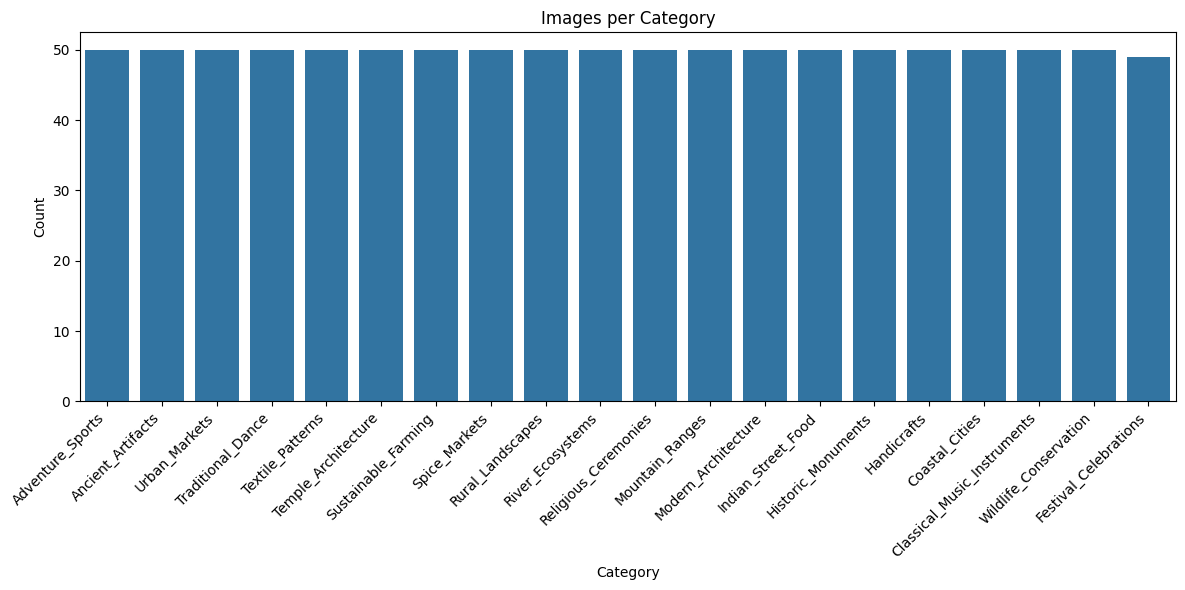


2. Analyzing image properties...

Image Properties Analysis:
Sampled images: 200

Image dimensions summary:
             width       height
count   200.000000   200.000000
mean   4467.330000  4552.705000
std    1357.550159  1505.852892
min    1912.000000  1455.000000
25%    3500.000000  3456.000000
50%    4107.500000  4160.000000
75%    5464.000000  5719.000000
max    8192.000000  8192.000000

Aspect ratio summary:
count    200.000000
mean       1.072818
std        0.421171
min        0.562500
25%        0.666667
50%        0.799902
75%        1.500000
max        1.912027
Name: aspect_ratio, dtype: float64

Color vs. Grayscale:
Color images: 200
Grayscale images: 0


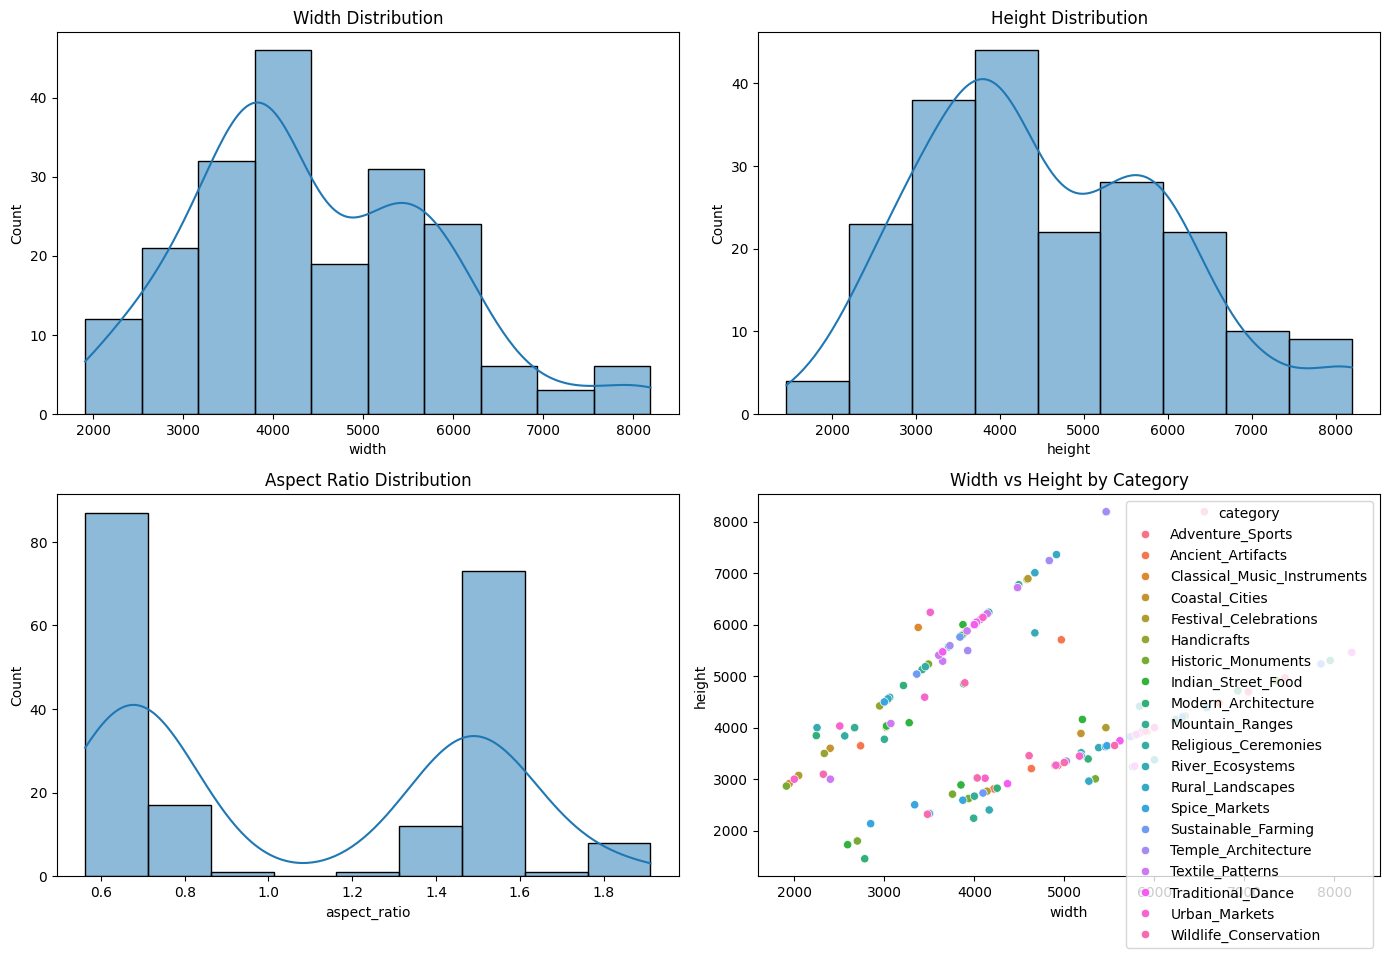


3. Extracting image features...


C:\Users\Rishita\AppData\Local\Temp\ipykernel_22984\3892375692.py:140: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(



4. Visualizing feature space...
Applying t-SNE dimensionality reduction...


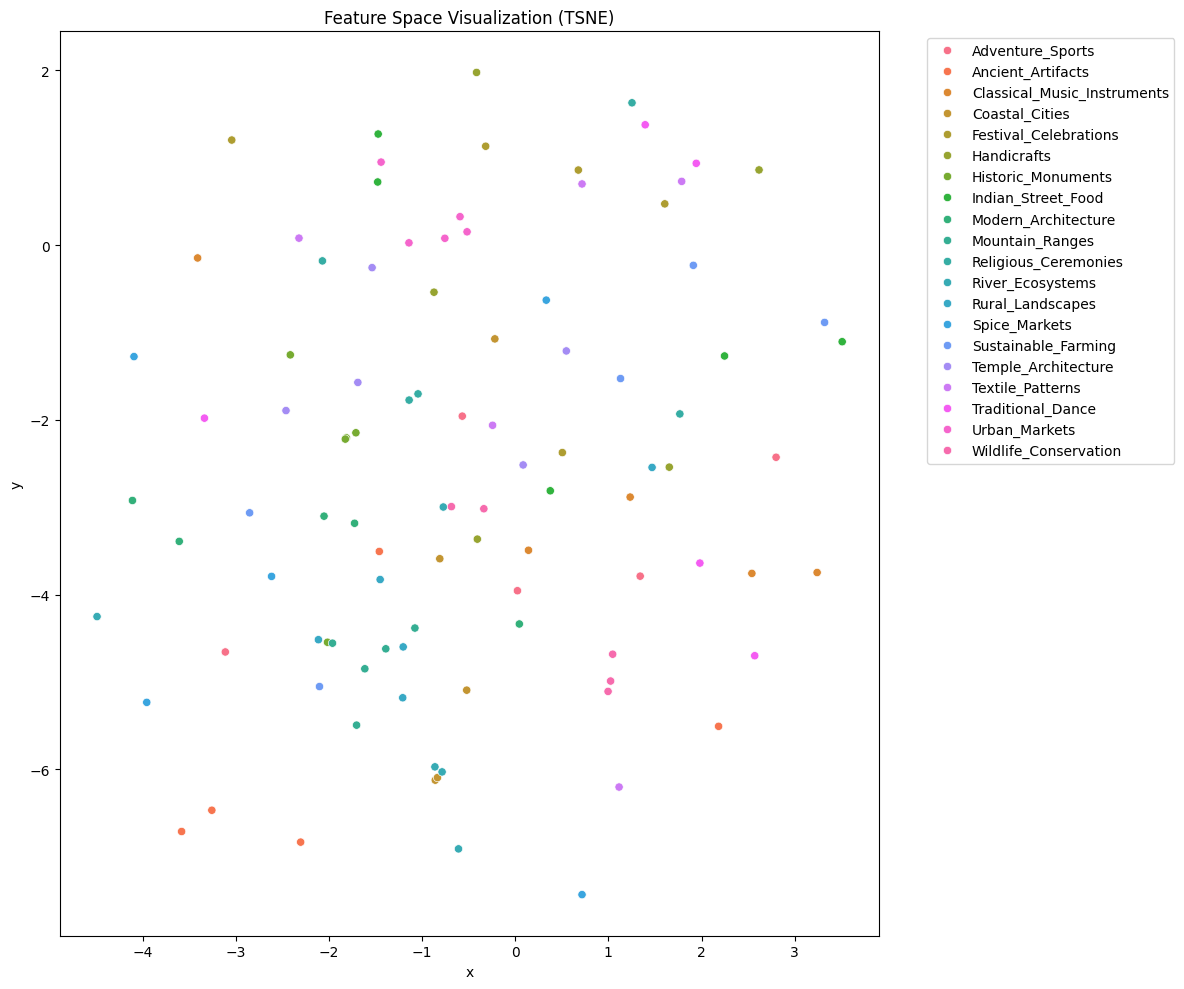


5. Finding similar images...
Query image: 9aa7604916850fe88130bd041cc4b821.jpg (Category: Ancient_Artifacts)

Most similar images:
1. 0bce86eaf6decc3e7b250ef305d5bf79.jpg (Category: Mountain_Ranges, Distance: 21.8675)
2. 677f9fd4fcc60302a4e74b15d660ed69.jpg (Category: Mountain_Ranges, Distance: 22.2056)
3. 36376861a375c851b24520ff6e72d56e.jpg (Category: Historic_Monuments, Distance: 22.2882)
4. 87462f431fcfc6ac118371fadfc77975.jpg (Category: Rural_Landscapes, Distance: 22.2931)
5. 56e7068811d4c1577df2260a6b43abeb.jpg (Category: Wildlife_Conservation, Distance: 22.6094)


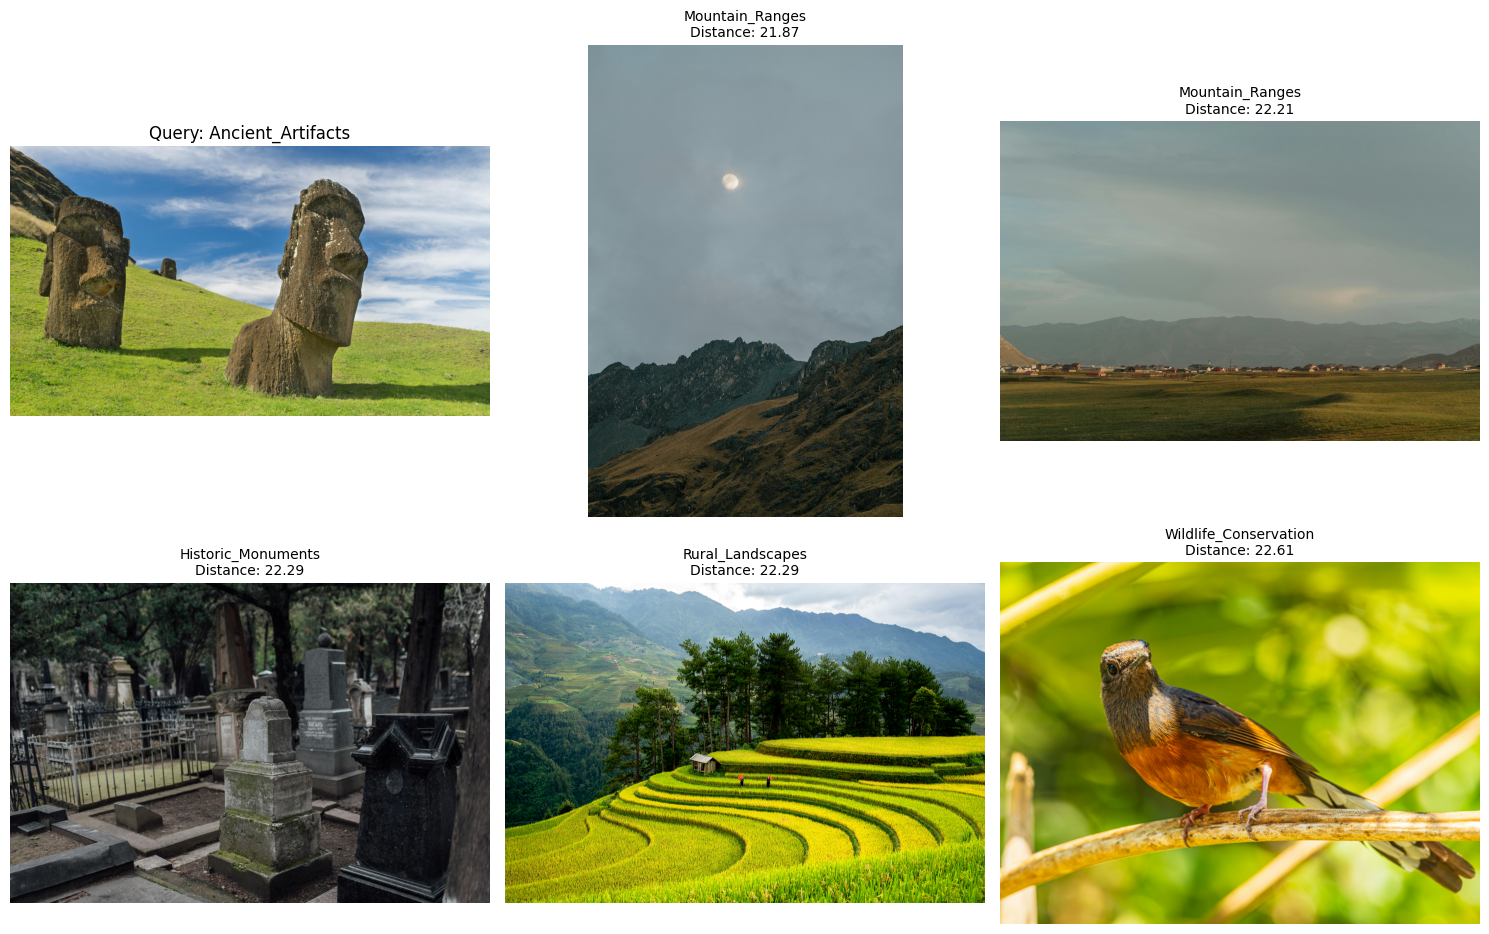


6. Analyzing category relationships...


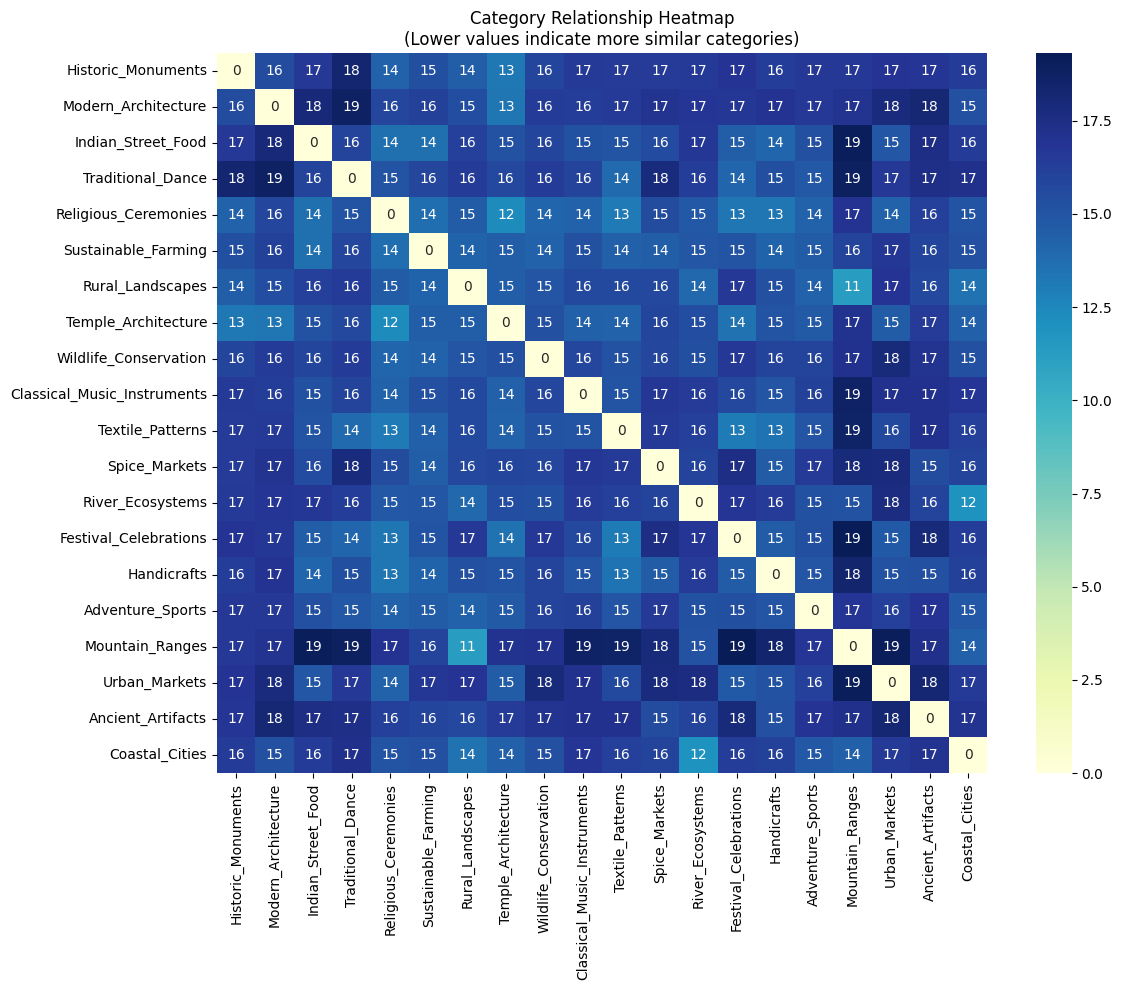

Most similar category pairs:
1. Rural_Landscapes & Mountain_Ranges (Distance: 11.2740)
2. River_Ecosystems & Coastal_Cities (Distance: 11.9368)
3. Religious_Ceremonies & Temple_Architecture (Distance: 12.3251)
4. Textile_Patterns & Festival_Celebrations (Distance: 13.0572)
5. Religious_Ceremonies & Textile_Patterns (Distance: 13.1969)

7. Tourism recommendations use case demo...

=== Tourism Recommendation Demo ===
Scenario: A user uploads three images from their past travels

Based on your Adventure Sports image, we recommend:
  1. Rishikesh - White water rafting in the Ganges
  2. Manali - Paragliding with Himalayan views
  3. Andaman Islands - Scuba diving in coral reefs

Based on your Ancient Artifacts image, we recommend:
  1. National Museum, Delhi - 5,000 years of Indian artifacts
  2. Salar Jung Museum, Hyderabad - One of India's largest collections
  3. Chhatrapati Shivaji Maharaj Vastu Sangrahalaya, Mumbai - Extensive collection

Based on your Mountain Ranges image, we recomm

<Figure size 1200x800 with 0 Axes>

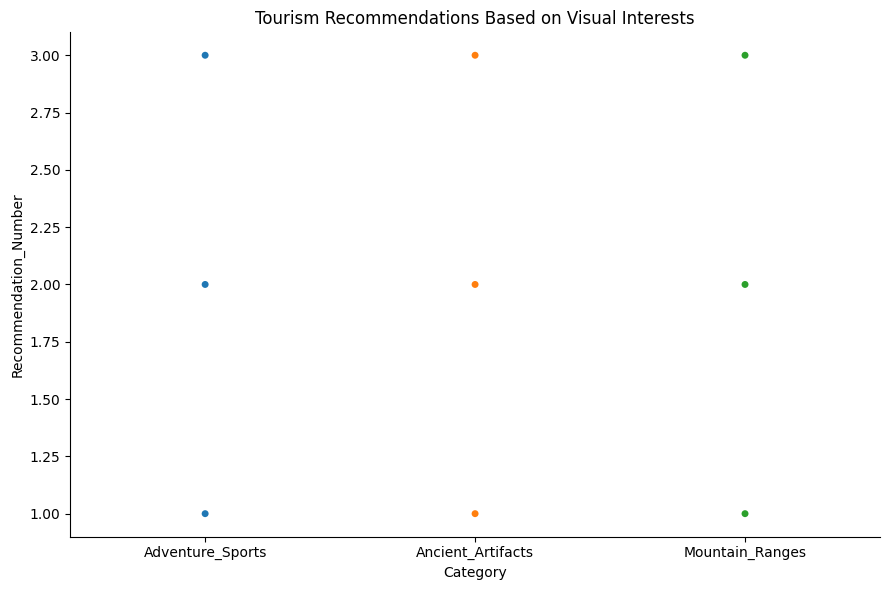

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import random
from collections import Counter

# Set the path to your dataset
DATASET_PATH = r"C:\Users\Rishita\Desktop\MMDP-Assignment\Task1_a\CulturalVisualCorpus"  # Update this to your actual path

def analyze_dataset_structure():
    """Analyze and visualize the structure of the dataset"""
    # Get categories
    categories = [d for d in os.listdir(DATASET_PATH) 
                 if os.path.isdir(os.path.join(DATASET_PATH, d))]
    
    # Count images per category
    image_counts = {}
    for category in categories:
        category_path = os.path.join(DATASET_PATH, category)
        images = [f for f in os.listdir(category_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        image_counts[category] = len(images)
    
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame(list(image_counts.items()), columns=['Category', 'Count'])
    df = df.sort_values('Count', ascending=False)
    
    # Display the counts
    print("Dataset Structure Analysis:")
    print(f"Total categories: {len(categories)}")
    print(f"Total images: {sum(image_counts.values())}")
    print("\nImages per category:")
    print(df)
    
    # Plot the distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Count', data=df)
    plt.title('Images per Category')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('category_distribution.png')
    plt.show()
    
    return df

def analyze_image_properties():
    """Analyze image properties across the dataset"""
    # Get categories
    categories = [d for d in os.listdir(DATASET_PATH) 
                 if os.path.isdir(os.path.join(DATASET_PATH, d))]
    
    # Sample images from each category (to avoid processing all images)
    image_properties = []
    for category in categories:
        category_path = os.path.join(DATASET_PATH, category)
        images = [f for f in os.listdir(category_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Sample up to 10 images per category
        sampled_images = random.sample(images, min(10, len(images)))
        
        for img_file in sampled_images:
            img_path = os.path.join(category_path, img_file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    aspect_ratio = width / height
                    is_color = img.mode == 'RGB'
                    
                    image_properties.append({
                        'category': category,
                        'filename': img_file,
                        'width': width,
                        'height': height,
                        'aspect_ratio': aspect_ratio,
                        'is_color': is_color
                    })
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    
    # Convert to DataFrame
    props_df = pd.DataFrame(image_properties)
    
    # Basic statistics
    print("\nImage Properties Analysis:")
    print(f"Sampled images: {len(props_df)}")
    print("\nImage dimensions summary:")
    print(props_df[['width', 'height']].describe())
    
    print("\nAspect ratio summary:")
    print(props_df['aspect_ratio'].describe())
    
    # Count color vs. grayscale
    color_counts = props_df['is_color'].value_counts()
    print("\nColor vs. Grayscale:")
    print(f"Color images: {color_counts.get(True, 0)}")
    print(f"Grayscale images: {color_counts.get(False, 0)}")
    
    # Visualize distributions
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Width distribution
    sns.histplot(props_df['width'], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Width Distribution')
    
    # Height distribution
    sns.histplot(props_df['height'], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Height Distribution')
    
    # Aspect ratio distribution
    sns.histplot(props_df['aspect_ratio'], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Aspect Ratio Distribution')
    
    # Width vs Height scatter
    sns.scatterplot(x='width', y='height', hue='category', data=props_df, ax=axes[1, 1])
    axes[1, 1].set_title('Width vs Height by Category')
    
    plt.tight_layout()
    plt.savefig('image_properties.png')
    plt.show()
    
    return props_df

def extract_features(model_name='mobilenetv2', sample_size=5):
    """Extract features from images using a pre-trained model"""
    # Get categories
    categories = [d for d in os.listdir(DATASET_PATH) 
                 if os.path.isdir(os.path.join(DATASET_PATH, d))]
    
    # Load pre-trained model
    if model_name.lower() == 'mobilenetv2':
        base_model = tf.keras.applications.MobileNetV2(
            weights='imagenet',
            include_top=False,
            pooling='avg'
        )
    elif model_name.lower() == 'resnet50':
        base_model = tf.keras.applications.ResNet50(
            weights='imagenet',
            include_top=False,
            pooling='avg'
        )
    else:
        raise ValueError("Unsupported model. Use 'mobilenetv2' or 'resnet50'")
    
    # Extract features
    features = []
    labels = []
    image_paths = []
    
    for category in categories:
        category_path = os.path.join(DATASET_PATH, category)
        images = [f for f in os.listdir(category_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Sample images from each category
        sampled_images = random.sample(images, min(sample_size, len(images)))
        
        for img_file in sampled_images:
            img_path = os.path.join(category_path, img_file)
            try:
                # Load and preprocess image
                img = load_img(img_path, target_size=(224, 224))
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = preprocess_input(img_array)
                
                # Extract features
                feature = base_model.predict(img_array, verbose=0)
                features.append(feature.flatten())
                labels.append(category)
                image_paths.append(img_path)
                
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    
    # Convert to numpy arrays
    features = np.array(features)
    
    return features, labels, image_paths

def visualize_feature_space(features, labels, technique='tsne'):
    """Visualize the feature space using dimensionality reduction"""
    # Reduce dimensions
    if technique.lower() == 'tsne':
        print("Applying t-SNE dimensionality reduction...")
        reducer = TSNE(n_components=2, random_state=42)
    elif technique.lower() == 'pca':
        print("Applying PCA dimensionality reduction...")
        reducer = PCA(n_components=2, random_state=42)
    else:
        raise ValueError("Unsupported technique. Use 'tsne' or 'pca'")
    
    reduced_features = reducer.fit_transform(features)
    
    # Create DataFrame for easier plotting
    df = pd.DataFrame({
        'x': reduced_features[:, 0],
        'y': reduced_features[:, 1],
        'category': labels
    })
    
    # Plot
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x='x', y='y', hue='category', data=df)
    plt.title(f'Feature Space Visualization ({technique.upper()})')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'feature_space_{technique}.png')
    plt.show()
    
    return reduced_features, df

def find_similar_images(features, labels, image_paths, query_idx, n=5):
    """Find images similar to a query image using feature similarity"""
    # Extract query feature
    query_feature = features[query_idx]
    query_category = labels[query_idx]
    query_path = image_paths[query_idx]
    
    # Calculate distances to all other features
    distances = np.linalg.norm(features - query_feature, axis=1)
    
    # Get indices of most similar images (excluding the query image)
    similar_indices = np.argsort(distances)[1:n+1]
    
    # Get similar image info
    similar_images = [
        {
            'path': image_paths[i],
            'category': labels[i],
            'distance': distances[i]
        }
        for i in similar_indices
    ]
    
    # Display results
    print(f"Query image: {os.path.basename(query_path)} (Category: {query_category})")
    print("\nMost similar images:")
    
    plt.figure(figsize=(15, 10))
    
    # Display query image
    plt.subplot(2, 3, 1)
    query_img = plt.imread(query_path)
    plt.imshow(query_img)
    plt.title(f"Query: {query_category}", fontsize=12)
    plt.axis('off')
    
    # Display similar images
    for i, img_info in enumerate(similar_images):
        plt.subplot(2, 3, i+2)
        similar_img = plt.imread(img_info['path'])
        plt.imshow(similar_img)
        plt.title(f"{img_info['category']}\nDistance: {img_info['distance']:.2f}", fontsize=10)
        plt.axis('off')
        
        print(f"{i+1}. {os.path.basename(img_info['path'])} "
              f"(Category: {img_info['category']}, Distance: {img_info['distance']:.4f})")
    
    plt.tight_layout()
    plt.savefig('similar_images.png')
    plt.show()
    
    return similar_images

def analyze_category_relationships(features, labels):
    """Analyze relationships between categories based on feature similarity"""
    # Calculate average feature vector for each category
    categories = list(set(labels))
    category_features = {}
    
    for category in categories:
        category_indices = [i for i, label in enumerate(labels) if label == category]
        category_features[category] = np.mean(features[category_indices], axis=0)
    
    # Calculate pairwise distances between category centroids
    distances = np.zeros((len(categories), len(categories)))
    
    for i, cat1 in enumerate(categories):
        for j, cat2 in enumerate(categories):
            distances[i, j] = np.linalg.norm(
                category_features[cat1] - category_features[cat2]
            )
    
    # Create DataFrame for the distance matrix
    distance_df = pd.DataFrame(distances, index=categories, columns=categories)
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(distance_df, annot=True, cmap='YlGnBu')
    plt.title('Category Relationship Heatmap\n(Lower values indicate more similar categories)')
    plt.tight_layout()
    plt.savefig('category_relationships.png')
    plt.show()
    
    # Find most similar category pairs
    category_pairs = []
    for i, cat1 in enumerate(categories):
        for j, cat2 in enumerate(categories):
            if i < j:  # To avoid duplicates
                category_pairs.append({
                    'category1': cat1,
                    'category2': cat2,
                    'distance': distances[i, j]
                })
    
    # Sort by distance
    category_pairs.sort(key=lambda x: x['distance'])
    
    print("Most similar category pairs:")
    for i, pair in enumerate(category_pairs[:5]):
        print(f"{i+1}. {pair['category1']} & {pair['category2']} "
              f"(Distance: {pair['distance']:.4f})")
    
    return distance_df, category_pairs

def tourism_recommendations_demo():
    """Demonstrate how the image classification could be used for tourism recommendations"""
    # Define sample tourism recommendations for each category
    recommendations = {
        'Adventure_Sports': [
            "Rishikesh - White water rafting in the Ganges",
            "Manali - Paragliding with Himalayan views",
            "Andaman Islands - Scuba diving in coral reefs"
        ],
        'Ancient_Artifacts': [
            "National Museum, Delhi - 5,000 years of Indian artifacts",
            "Salar Jung Museum, Hyderabad - One of India's largest collections",
            "Chhatrapati Shivaji Maharaj Vastu Sangrahalaya, Mumbai - Extensive collection"
        ],
        'Mountain_Ranges': [
            "Himalayas - Experience the world's highest mountain range",
            "Western Ghats - UNESCO World Heritage site with rich biodiversity",
            "Aravalli Range - One of the oldest mountain ranges in the world"
        ]
    }
    
    # Simulate a user uploading images from different categories
    sample_categories = list(recommendations.keys())
    
    # Create a demo dataframe for visualization
    demo_data = []
    for category in sample_categories:
        for i, rec in enumerate(recommendations[category]):
            demo_data.append({
                'Category': category,
                'Recommendation': rec,
                'Recommendation_Number': i+1
            })
    
    demo_df = pd.DataFrame(demo_data)
    
    # Visualize the recommendations
    plt.figure(figsize=(12, 8))
    sns.catplot(
        x='Category', 
        y='Recommendation_Number', 
        hue='Category',
        data=demo_df, 
        kind='swarm',
        height=6,
        aspect=1.5
    )
    plt.title('Tourism Recommendations Based on Visual Interests')
    plt.tight_layout()
    plt.savefig('tourism_recommendations.png')
    
    # Print out the scenario
    print("\n=== Tourism Recommendation Demo ===")
    print("Scenario: A user uploads three images from their past travels")
    
    for category in sample_categories:
        print(f"\nBased on your {category.replace('_', ' ')} image, we recommend:")
        for i, rec in enumerate(recommendations[category]):
            print(f"  {i+1}. {rec}")

# Run the analysis (uncomment sections as needed)
if __name__ == "__main__":
    print("=== Indian Cultural Visual Dataset Analysis ===")
    
    # Analyze dataset structure
    print("\n1. Analyzing dataset structure...")
    structure_df = analyze_dataset_structure()
    
    # Analyze image properties
    print("\n2. Analyzing image properties...")
    props_df = analyze_image_properties()
    
    # Extract features and visualize feature space
    print("\n3. Extracting image features...")
    features, labels, image_paths = extract_features(sample_size=5)
    
    print("\n4. Visualizing feature space...")
    reduced_features, feature_df = visualize_feature_space(features, labels, technique='tsne')
    
    # Find similar images to a random query image
    print("\n5. Finding similar images...")
    query_idx = random.randint(0, len(features)-1)
    similar_images = find_similar_images(features, labels, image_paths, query_idx)
    
    # Analyze category relationships
    print("\n6. Analyzing category relationships...")
    distance_df, category_pairs = analyze_category_relationships(features, labels)
    
    # Demonstrate tourism recommendations use case
    print("\n7. Tourism recommendations use case demo...")
    tourism_recommendations_demo()
    
    print("\nAnalysis complete. Visualizations saved to disk.")

## Use case

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random
from tqdm import tqdm
import shutil
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [17]:
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 20
BASE_DIR = r'C:\Users\Rishita\Desktop\MMDP-Assignment\Task1_a\CulturalVisualCorpus'  # Update this to your dataset path

Using device: cuda


In [18]:
# Function to create train/validation/test splits
def create_data_splits(base_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """
    Creates train, validation, and test splits from the original dataset
    """
    # Create directories for splits if they don't exist
    os.makedirs('data/train', exist_ok=True)
    os.makedirs('data/validation', exist_ok=True)
    os.makedirs('data/test', exist_ok=True)
    
    # Get all categories
    categories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    
    for category in categories:
        # Create category directories in each split
        os.makedirs(f'data/train/{category}', exist_ok=True)
        os.makedirs(f'data/validation/{category}', exist_ok=True)
        os.makedirs(f'data/test/{category}', exist_ok=True)
        
        # Get all images in this category
        cat_dir = os.path.join(base_dir, category)
        images = [img for img in os.listdir(cat_dir) if img.endswith(('.jpg', '.jpeg', '.png'))]
        
        # Shuffle images
        random.shuffle(images)
        
        # Calculate split indices
        n_images = len(images)
        train_end = int(n_images * train_ratio)
        val_end = train_end + int(n_images * val_ratio)
        
        # Split the images
        train_images = images[:train_end]
        val_images = images[train_end:val_end]
        test_images = images[val_end:]
        
        # Use file copying instead of symlinks for Windows compatibility
        import shutil
        
        for img in train_images:
            src = os.path.join(cat_dir, img)
            dst = os.path.join('data/train', category, img)
            if not os.path.exists(dst):
                shutil.copy2(src, dst)
        
        for img in val_images:
            src = os.path.join(cat_dir, img)
            dst = os.path.join('data/validation', category, img)
            if not os.path.exists(dst):
                shutil.copy2(src, dst)
        
        for img in test_images:
            src = os.path.join(cat_dir, img)
            dst = os.path.join('data/test', category, img)
            if not os.path.exists(dst):
                shutil.copy2(src, dst)
    
    print(f"Data split complete: {len(categories)} categories processed")
    return categories

# Data transformations and datasets
def create_data_loaders():
    """
    Creates data loaders with augmentation for training
    """
    # Training transforms with augmentation
    train_transforms = transforms.Compose([
        transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Validation and test transforms (no augmentation)
    valid_test_transforms = transforms.Compose([
        transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Create datasets
    train_dataset = datasets.ImageFolder('data/train', transform=train_transforms)
    validation_dataset = datasets.ImageFolder('data/validation', transform=valid_test_transforms)
    test_dataset = datasets.ImageFolder('data/test', transform=valid_test_transforms)
    
    # Create data loaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=BATCH_SIZE, 
        shuffle=True, 
        num_workers=4,
        pin_memory=True
    )
    
    validation_loader = DataLoader(
        validation_dataset, 
        batch_size=BATCH_SIZE, 
        shuffle=False, 
        num_workers=4,
        pin_memory=True
    )
    
    test_loader = DataLoader(
        test_dataset, 
        batch_size=BATCH_SIZE, 
        shuffle=False, 
        num_workers=4,
        pin_memory=True
    )
    
    # Get class names
    class_names = [x for x in train_dataset.class_to_idx.keys()]
    
    return train_loader, validation_loader, test_loader, class_names

# Custom CNN Model
class CulturalCNN(nn.Module):
    def __init__(self, num_classes):
        super(CulturalCNN, self).__init__()
        
        # First convolutional block
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )
        
        # Second convolutional block
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )
        
        # Third convolutional block
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )
        
        # Calculate the input size for the first fully connected layer
        fc_input_size = 128 * (IMG_HEIGHT // 8) * (IMG_WIDTH // 8)
        
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(fc_input_size, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.fc(x)
        return x

# Alternative: Use a pre-trained model (ResNet50)
def create_pretrained_model(num_classes):
    """
    Creates a pre-trained ResNet50 model with modified final layer
    """
    model = models.resnet50(pretrained=True)
    
    # Freeze early layers
    for param in list(model.parameters())[:-20]:
        param.requires_grad = False
    
    # Replace final fully connected layer
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    
    model = model.to(device)
    return model

# Training function
def train_model(model, train_loader, validation_loader, criterion, optimizer, scheduler, num_epochs):
    """
    Trains the model and returns training history
    """
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    best_val_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        # Wrap train_loader with tqdm for progress tracking
        train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")
        
        for inputs, labels in train_loader_tqdm:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_acc.item())
        
        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        
        with torch.no_grad():
            for inputs, labels in tqdm(validation_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]"):
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # Forward pass
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                
                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
        
        epoch_loss = running_loss / len(validation_loader.dataset)
        epoch_acc = running_corrects.double() / len(validation_loader.dataset)
        
        print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        history['val_loss'].append(epoch_loss)
        history['val_acc'].append(epoch_acc.item())
        
        # Update scheduler
        scheduler.step(epoch_loss)
        
        # Save best model
        if epoch_acc > best_val_acc:
            best_val_acc = epoch_acc
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Saved new best model with validation accuracy: {best_val_acc:.4f}')
    
    # Load best model
    model.load_state_dict(torch.load('best_model.pth'))
    return model, history

# Function to plot training history
def plot_training_history(history):
    """
    Plots the training and validation accuracy/loss
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracy
    ax1.plot(history['train_acc'])
    ax1.plot(history['val_acc'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot loss
    ax2.plot(history['train_loss'])
    ax2.plot(history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

# Function to evaluate the model
def evaluate_model(model, test_loader, class_names):
    """
    Evaluates the model on the test set and generates classification metrics
    """
    model.eval()
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Convert to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    
    # Calculate accuracy
    accuracy = np.mean(all_preds == all_labels)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Create and plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(15, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()
    
    return accuracy, all_preds, all_labels


Data split complete: 20 categories processed


c:\Users\Rishita\Desktop\MMDP-Assignment\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rishita\Desktop\MMDP-Assignment\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Epoch 1/20 [Train]: 100%|██████████| 22/22 [01:41<00:00,  4.61s/it]


Train Loss: 2.3408 Acc: 0.2976


Epoch 1/20 [Val]: 100%|██████████| 5/5 [00:28<00:00,  5.78s/it]


Val Loss: 5.6004 Acc: 0.3429
Saved new best model with validation accuracy: 0.3429
Epoch 2/20
----------


Epoch 2/20 [Train]: 100%|██████████| 22/22 [02:17<00:00,  6.23s/it]


Train Loss: 1.4877 Acc: 0.5322


Epoch 2/20 [Val]: 100%|██████████| 5/5 [00:33<00:00,  6.64s/it]


Val Loss: 2.5789 Acc: 0.4143
Saved new best model with validation accuracy: 0.4143
Epoch 3/20
----------


Epoch 3/20 [Train]: 100%|██████████| 22/22 [01:52<00:00,  5.10s/it]


Train Loss: 1.2875 Acc: 0.5923


Epoch 3/20 [Val]: 100%|██████████| 5/5 [00:34<00:00,  6.87s/it]


Val Loss: 1.9323 Acc: 0.4714
Saved new best model with validation accuracy: 0.4714
Epoch 4/20
----------


Epoch 4/20 [Train]: 100%|██████████| 22/22 [02:15<00:00,  6.15s/it]


Train Loss: 0.9343 Acc: 0.7067


Epoch 4/20 [Val]: 100%|██████████| 5/5 [00:35<00:00,  7.06s/it]


Val Loss: 2.3651 Acc: 0.4643
Epoch 5/20
----------


Epoch 5/20 [Train]: 100%|██████████| 22/22 [02:01<00:00,  5.53s/it]


Train Loss: 0.8007 Acc: 0.7339


Epoch 5/20 [Val]: 100%|██████████| 5/5 [00:30<00:00,  6.10s/it]


Val Loss: 1.9858 Acc: 0.5286
Saved new best model with validation accuracy: 0.5286
Epoch 6/20
----------


Epoch 6/20 [Train]: 100%|██████████| 22/22 [02:04<00:00,  5.67s/it]


Train Loss: 0.6836 Acc: 0.7868


Epoch 6/20 [Val]: 100%|██████████| 5/5 [00:29<00:00,  5.84s/it]


Val Loss: 2.5137 Acc: 0.4714
Epoch 7/20
----------


Epoch 7/20 [Train]: 100%|██████████| 22/22 [01:41<00:00,  4.64s/it]


Train Loss: 0.6131 Acc: 0.8112


Epoch 7/20 [Val]: 100%|██████████| 5/5 [00:38<00:00,  7.66s/it]


Val Loss: 2.5464 Acc: 0.4857
Epoch 8/20
----------


Epoch 8/20 [Train]: 100%|██████████| 22/22 [02:30<00:00,  6.86s/it]


Train Loss: 0.3911 Acc: 0.8784


Epoch 8/20 [Val]: 100%|██████████| 5/5 [00:34<00:00,  6.93s/it]


Val Loss: 1.9118 Acc: 0.5214
Epoch 9/20
----------


Epoch 9/20 [Train]: 100%|██████████| 22/22 [02:00<00:00,  5.47s/it]


Train Loss: 0.2669 Acc: 0.9113


Epoch 9/20 [Val]: 100%|██████████| 5/5 [00:24<00:00,  4.95s/it]


Val Loss: 1.8399 Acc: 0.5714
Saved new best model with validation accuracy: 0.5714
Epoch 10/20
----------


Epoch 10/20 [Train]: 100%|██████████| 22/22 [01:37<00:00,  4.44s/it]


Train Loss: 0.2344 Acc: 0.9371


Epoch 10/20 [Val]: 100%|██████████| 5/5 [00:28<00:00,  5.64s/it]


Val Loss: 1.8781 Acc: 0.5500
Epoch 11/20
----------


Epoch 11/20 [Train]: 100%|██████████| 22/22 [01:46<00:00,  4.85s/it]


Train Loss: 0.1973 Acc: 0.9456


Epoch 11/20 [Val]: 100%|██████████| 5/5 [00:30<00:00,  6.14s/it]


Val Loss: 1.8116 Acc: 0.5714
Epoch 12/20
----------


Epoch 12/20 [Train]: 100%|██████████| 22/22 [01:41<00:00,  4.61s/it]


Train Loss: 0.1493 Acc: 0.9657


Epoch 12/20 [Val]: 100%|██████████| 5/5 [00:26<00:00,  5.27s/it]


Val Loss: 1.9057 Acc: 0.5429
Epoch 13/20
----------


Epoch 13/20 [Train]: 100%|██████████| 22/22 [01:41<00:00,  4.60s/it]


Train Loss: 0.1340 Acc: 0.9671


Epoch 13/20 [Val]: 100%|██████████| 5/5 [00:29<00:00,  5.90s/it]


Val Loss: 1.9452 Acc: 0.5286
Epoch 14/20
----------


Epoch 14/20 [Train]: 100%|██████████| 22/22 [01:41<00:00,  4.63s/it]


Train Loss: 0.1267 Acc: 0.9671


Epoch 14/20 [Val]: 100%|██████████| 5/5 [00:28<00:00,  5.70s/it]


Val Loss: 2.0132 Acc: 0.5429
Epoch 15/20
----------


Epoch 15/20 [Train]: 100%|██████████| 22/22 [01:48<00:00,  4.94s/it]


Train Loss: 0.0988 Acc: 0.9757


Epoch 15/20 [Val]: 100%|██████████| 5/5 [00:35<00:00,  7.13s/it]


Val Loss: 1.9539 Acc: 0.5286
Epoch 16/20
----------


Epoch 16/20 [Train]: 100%|██████████| 22/22 [01:50<00:00,  5.02s/it]


Train Loss: 0.1074 Acc: 0.9671


Epoch 16/20 [Val]: 100%|██████████| 5/5 [00:28<00:00,  5.70s/it]


Val Loss: 1.9129 Acc: 0.5500
Epoch 17/20
----------


Epoch 17/20 [Train]: 100%|██████████| 22/22 [01:56<00:00,  5.29s/it]


Train Loss: 0.0715 Acc: 0.9857


Epoch 17/20 [Val]: 100%|██████████| 5/5 [00:29<00:00,  5.98s/it]


Val Loss: 1.9127 Acc: 0.5500
Epoch 18/20
----------


Epoch 18/20 [Train]: 100%|██████████| 22/22 [01:41<00:00,  4.60s/it]


Train Loss: 0.0771 Acc: 0.9814


Epoch 18/20 [Val]: 100%|██████████| 5/5 [00:30<00:00,  6.07s/it]


Val Loss: 1.9452 Acc: 0.5286
Epoch 19/20
----------


Epoch 19/20 [Train]: 100%|██████████| 22/22 [01:41<00:00,  4.63s/it]


Train Loss: 0.0831 Acc: 0.9771


Epoch 19/20 [Val]: 100%|██████████| 5/5 [00:28<00:00,  5.73s/it]


Val Loss: 1.9393 Acc: 0.5357
Epoch 20/20
----------


Epoch 20/20 [Train]: 100%|██████████| 22/22 [01:46<00:00,  4.85s/it]


Train Loss: 0.0839 Acc: 0.9800


Epoch 20/20 [Val]: 100%|██████████| 5/5 [00:31<00:00,  6.20s/it]


Val Loss: 1.9529 Acc: 0.5429


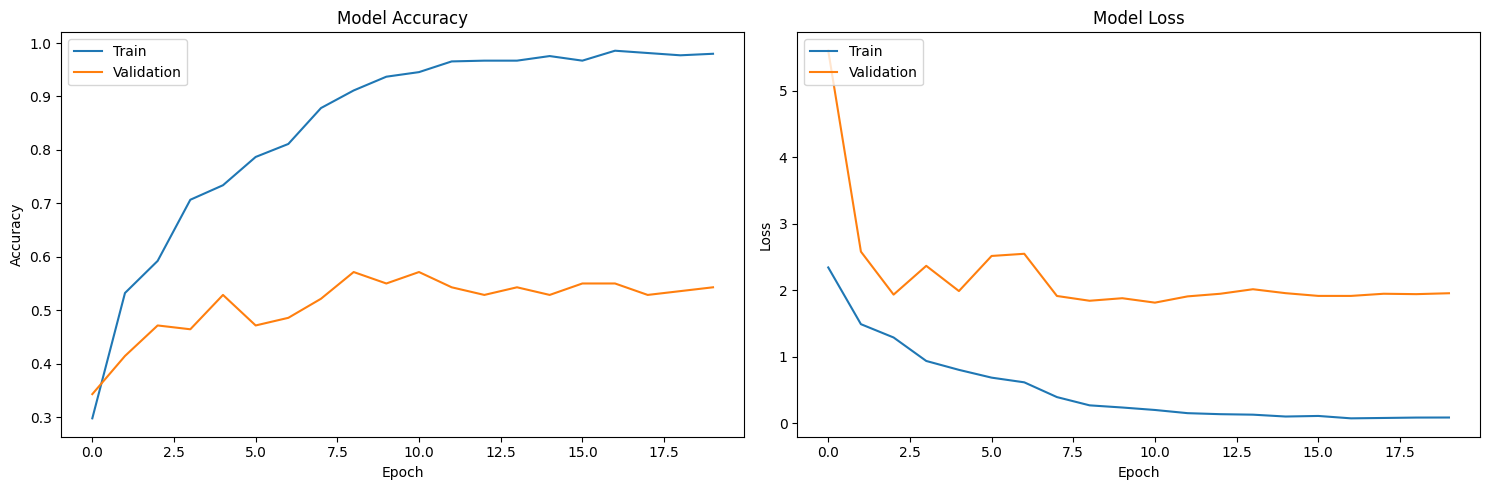

Evaluating: 100%|██████████| 5/5 [00:36<00:00,  7.29s/it]


Test Accuracy: 0.5437

Classification Report:
                             precision    recall  f1-score   support

           Adventure_Sports       0.83      0.62      0.71         8
          Ancient_Artifacts       0.43      0.38      0.40         8
Classical_Music_Instruments       1.00      0.88      0.93         8
             Coastal_Cities       0.40      0.50      0.44         8
      Festival_Celebrations       0.38      0.38      0.38         8
                Handicrafts       0.50      0.12      0.20         8
         Historic_Monuments       0.43      0.38      0.40         8
         Indian_Street_Food       0.80      0.50      0.62         8
        Modern_Architecture       0.73      1.00      0.84         8
            Mountain_Ranges       0.60      0.75      0.67         8
       Religious_Ceremonies       0.23      0.38      0.29         8
           River_Ecosystems       0.50      0.50      0.50         8
           Rural_Landscapes       0.44      0.50      0.

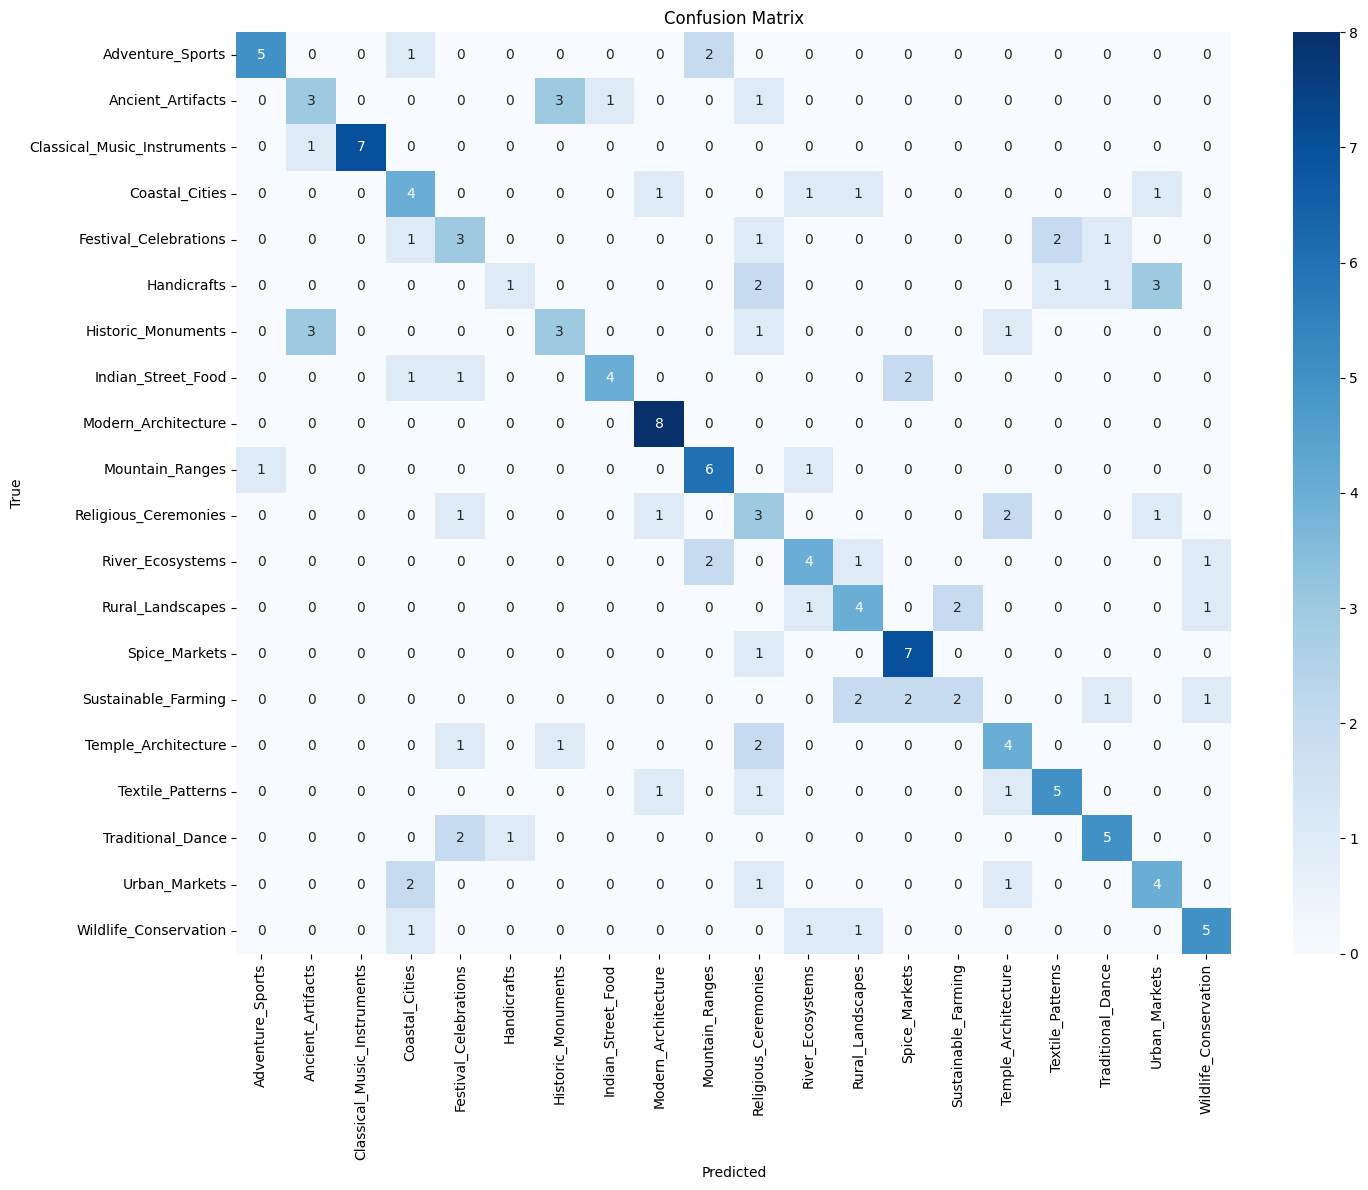

Model saved as 'cultural_image_classifier.pth'


In [19]:

# Main function
def main():
    # Create the data splits
    categories = create_data_splits(BASE_DIR)
    
    # Create data loaders
    train_loader, validation_loader, test_loader, class_names = create_data_loaders()
    
    # Create the model
    num_classes = len(categories)
    
    # Option 1: Custom CNN
    # model = CulturalCNN(num_classes).to(device)
    
    # Option 2: Pre-trained ResNet50 (better performance with small datasets)
    model = create_pretrained_model(num_classes)
    
    # Print model summary
    print(model)
    
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=3, min_lr=1e-6)
    
    # Train the model
    model, history = train_model(
        model,
        train_loader,
        validation_loader,
        criterion,
        optimizer,
        scheduler,
        num_epochs=EPOCHS
    )
    
    # Plot training history
    plot_training_history(history)
    
    # Evaluate the model
    accuracy, predicted_classes, true_classes = evaluate_model(model, test_loader, class_names)
    
    # Save the model
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'class_names': class_names
    }, 'cultural_image_classifier.pth')
    
    print("Model saved as 'cultural_image_classifier.pth'")
    
    # Return some metrics to be used elsewhere if needed
    return {
        'accuracy': accuracy,
        'categories': categories,
        'model': model,
        'predictions': predicted_classes,
        'true_classes': true_classes
    }

# For inference
def predict_image(image_path, model, class_names):
    """
    Predicts the class of a single image
    """
    # Image transformations
    transform = transforms.Compose([
        transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Load and transform the image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    # Set model to evaluation mode
    model.eval()
    
    # Get prediction
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_names[predicted.item()]
        
        # Get probabilities
        probabilities = F.softmax(outputs, dim=1)[0]
        
    return predicted_class, probabilities.cpu().numpy()

if __name__ == "__main__":
    main()